# Phase 1 Code Challenge Review 


TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

In [1]:
# to run functions from .py file 
# %load_ext autoreload
# %autoreload 1  

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

# df2 = pd.read_csv('auto-mpg.csv')

In [7]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# examine the dimensions of it
df.shape

(150, 5)

In [9]:
# check to see if you have missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# introduce some missing values
df.iloc[2:10,1:3] = np.nan

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     8
petal_length    8
petal_width     0
species         0
dtype: int64

In [12]:
df.shape

(150, 5)

In [13]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [161]:
# drop them by certain columns
df.dropna(subset = ['sepal_width'], axis = 0, inplace = True)

In [15]:
# convert and modify columns
#df.rename(columns = df.columns.map(lambda x: x.capitalize))
# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df['sepal_length'].map(lambda x: x*10)   # df['sepal_length']*10

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
2,4.7,NaN,NaN,0.2,setosa,47.0
3,4.6,NaN,NaN,0.2,setosa,46.0
4,5.0,NaN,NaN,0.2,setosa,50.0


In [17]:
# another way?
df['sepal_length_10_lambda'] = df['sepal_length'].apply(lambda x:x*10)

#### 2. Data Visualization

In [18]:
# how many species are there, and how many flowers are in each species
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
df.groupby(['species'])['species'].count()

species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# let's plot the average pedal length for each species of iris 


In [20]:
petal_length_by_sp = df.groupby(['species']).petal_length.mean()

In [21]:
petal_length_by_sp.index

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

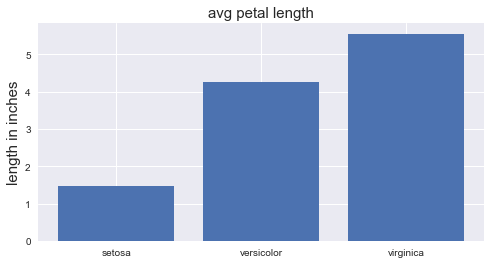

In [22]:
### your code here
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(petal_length_by_sp.index, petal_length_by_sp.values)
ax.set_title('avg petal length', size=15)
ax.set_ylabel('length in inches', size=15)
plt.show()

<BarContainer object of 4 artists>

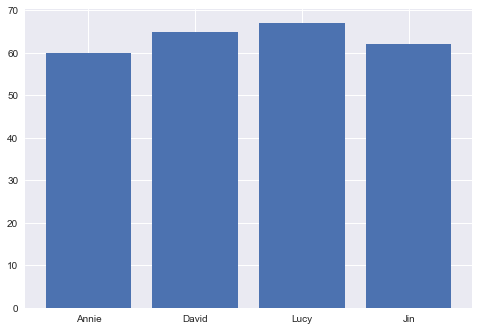

In [23]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)


## Create a Scatterplot of for sepal length and sepal width

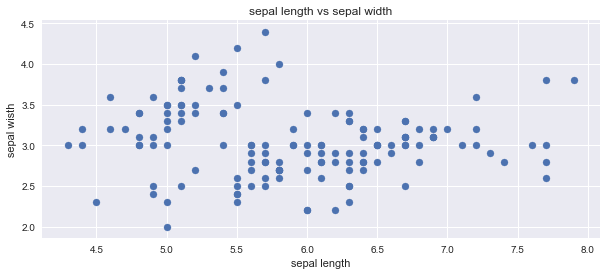

In [24]:
# scatterplot your code here 
fig, ax = plt.subplots(figsize=(10,4))

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df['sepal_length'], df['sepal_width'])

ax.set_xlabel("sepal length")
ax.set_ylabel("sepal wisth")
ax.set_title('sepal length vs sepal width')


plt.show()

In [25]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lambda
sepal_length,1.000000,-0.092449,0.861474,0.817941,1.000000,1.000000
sepal_width,-0.092449,1.000000,-0.414134,-0.349062,-0.092449,-0.092449
petal_length,0.861474,-0.414134,1.000000,0.959259,0.861474,0.861474
petal_width,0.817941,-0.349062,0.959259,1.000000,0.817941,0.817941
sepal_length_10,1.000000,-0.092449,0.861474,0.817941,1.000000,1.000000
sepal_length_10_lambda,1.000000,-0.092449,0.861474,0.817941,1.000000,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [184]:
# calculate the mean and median value for sepal length 
print(df['sepal_length'].mean())
df['sepal_length'].median()

5.900704225352114


5.8

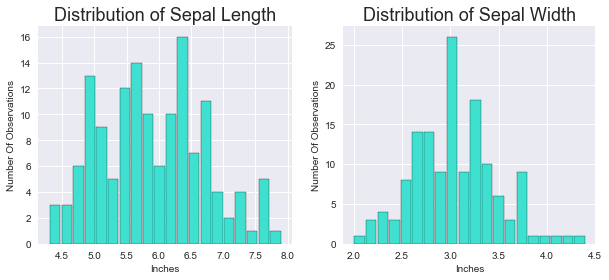

In [189]:
# what can you say about the distribution of sepal length and sepal width based on this distribution? 
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(df.sepal_length, bins= 20, color='turquoise', rwidth = 0.9, edgecolor= 'black')
ax1.set_title("Distribution of Sepal Length", size= 18)
ax1.set_xlabel('Inches', size=10)
ax1.set_ylabel('Number Of Observations', size=10)

ax2.hist(df.sepal_width,bins= 20, color='turquoise', rwidth = 0.9, edgecolor= 'black')
ax2.set_title("Distribution of Sepal Width", size= 18)
ax2.set_xlabel('Inches', size=10)
ax2.set_ylabel('Number Of Observations', size=10)
plt.show()

In [190]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0,54.0


In [30]:
# which flower has the longest petal? what is the species of that flower
df.groupby(['species']).petal_length.max().index[-1]

'virginica'

In [ ]:
df.petal_length.max

In [192]:
df.sort_values(by = 'petal_length', ascending = False).head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0
122,7.7,2.8,6.7,2.0,virginica,77.0,77.0
117,7.7,3.8,6.7,2.2,virginica,77.0,77.0


In [193]:
# use logical subset
df[df.petal_length == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


#### 4. Python Data Structure 

In [68]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]}

In [206]:
get_money['get'][0]['get'][0]['get']

'money'

Can you parse this data structure to show where the money resides?

In [76]:
# get the money 
get_money['get'][0]['get'][0]['get']

'money'

In [31]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [32]:
list(groomer_info['pets'][0].items())[0]

('Ginger',
 [{'age': 5, 'type': 'Pitbull', 'attribute': ['Playful', 'Cheery', 'Hyper']}])

In [33]:
# explore the structure of dictionary
names = list(groomer_info['pets'][0].keys())

In [34]:
names

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [35]:
#  create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']

name_pets = []
for name,info in groomer_info['pets'][0].items():
    for d in info:
        name_pets.append(d['type'])
name_pets

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [36]:
# flatten_matrix = [val for sublist in matrix for val in sublist] 
# [y for x in a for y in [x[0]] * x[1]]
# reduce(lambda x, y: x.extend(y), l)

[ d['type'] for k,v in groomer_info['pets'][0].items() for d in v]

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [306]:
list(groomer_info['pets'][0].items())

[('Ginger',
  [{'age': 5,
    'type': 'Pitbull',
    'attribute': ['Playful', 'Cheery', 'Hyper']}]),
 ('Chloe',
  [{'age': 1,
    'type': 'Maine Coon Cat',
    'attribute': ['Alert', 'Independent', 'Playful']}]),
 ('Joe Rogan',
  [{'age': 8,
    'type': 'Parrot',
    'attribute': ['Loud', 'Opinionated', 'Annoying']}]),
 ('Rick Astley',
  [{'age': 2,
    'type': 'Labrador',
    'attributes': ['never', 'gives', 'you', 'up']}])]

In [43]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(groomer_info, age):
    names = []
    for k,v in groomer_info['pets'][0].items():
        for d in v:
            if d['age'] > age:
                names.append(k)
    return names

In [44]:
[ d['type'] for k,v in groomer_info['pets'][0].items() for d in v if d['age']>4]

['Pitbull', 'Parrot']

In [138]:
pets_older_than(groomer_info,4)
>>> ['Ginger','Joe Rogan']

['Ginger', 'Joe Rogan']

syntax of list comprehension: [expression for item in collection if xxx else xxx]
for example:
[i*2 for i in list]